In [1]:
pip install bertopic

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [1]:
import sentence_transformers

print(sentence_transformers.__version__)

2.2.2


In [1]:
pip install sentence-transformers==2.2.2

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [4]:
import bertopic

print(bertopic.__version__)


0.15.0


In [5]:
pip install bertopic==0.15.0

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install hdbscan

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [4]:
import gensim

print("Gensim version:", gensim.__version__)

Gensim version: 4.1.2


In [5]:
pip install gensim==4.1.2

Note: you may need to restart the kernel to use updated packages.


In [66]:
from copy import deepcopy
from bertopic import BERTopic
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import CoherenceModel

In [67]:
# Data processing
import pandas as pd
import numpy as np
# Text preprocessiong
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()# Topic model
from bertopic import BERTopic# Dimension reduction
from umap import UMAP

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\peini\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\peini\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### (I) Data Pre-Processing

In [68]:
# Read in data
df = pd.read_excel('excel_file.xlsx')
print(df.shape)

(3848, 7)


In [69]:
df.head(10)

,name,price,reviewers,dates,ratings,titles,contents
0,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Abraham,"Reviewed in the United States on June 4, 2023",4.6 out of 5,Worth every penny,This is a must have if you are in a rainy area...
1,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,The Review,"Reviewed in the United States on April 23, 2023",4.6 out of 5,comfortable and completely water proof,"very wet rainy season this year, so had ample ..."
2,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Abraham,"Reviewed in the United States on June 4, 2023",4.6 out of 5,Muy útil,"Cómoda , resiste el frío y el agua"
3,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Amazon Customer,"Reviewed in the United States on May 17, 2023",4.6 out of 5,Very Nice,Fits well and great materials and construction
4,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Nelson Junior Jara Montiel,"Reviewed in the United States on May 28, 2023",4.6 out of 5,"Different fit, cheaper design",I am replacing the original venture jacket. Th...
5,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,JRandyMyrick,"Reviewed in the United States on May 1, 2023",4.6 out of 5,Garment,Color inside. Pockets
6,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,The Review,"Reviewed in the United States on April 23, 2023",4.6 out of 5,Keeps me dry.,The jacket looks to be well made and did a gre...
7,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,harv,"Reviewed in the United States on June 3, 2023",4.6 out of 5,Outstanding Quality,Exactly what I ordered! The product is outstan...
8,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Sam,"Reviewed in the United States on February 27, ...",4.6 out of 5,as expected,very lightweight weatherproof shell. the mater...
9,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Amy,"Reviewed in the United States on March 18, 2023",4.6 out of 5,It's just a basic windbreaker,You're definitly only paying for the name. The...


### (II) Data Cleaning

In [70]:
import pandas as pd
import numpy as np

def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_dataframe(df, head=5, tail=5):
    print('SHAPE'.center(82, '~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print('TYPES'.center(82, '~'))
    print(df.dtypes)
    print("~" * 82)
    print(missing_values_analysis(df))
    print('DUPLICATED VALUES'.center(83, '~'))
    print(df.duplicated().sum())
    print("QUANTILES".center(82, '~'))
    print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_dataframe(df)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 3848
Columns: 7
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
name         object
price        object
reviewers    object
dates        object
ratings      object
titles       object
contents     object
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
           Missing Values  Ratio
ratings                39   1.01
dates                  57   1.48
titles                 62   1.61
name                   75   1.95
contents               80   2.08
reviewers             207   5.38
price                1448  37.63
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
90
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Empty DataFrame
Columns: [0.0, 0.05, 0.5, 0.95, 0.99, 1.0]
Index: []


In [71]:
# Replace missing values with "anonymous" in the entire dataframe
df_filled = df.fillna("anonymous")

# Replace missing values with "anonymous" in a specific column
df['reviewers'] = df['reviewers'].fillna("anonymous")

In [72]:
def remove_repeated_words(dates):
    if isinstance(dates, float):
        return dates
    words = str(dates).split()
    unique_words = []
    for word in words:
        if word != 'Reviewed' and word != 'in' and word != 'the' and word != 'United' and word != 'States' and word != 'on' and word != 'Germany' and word != 'Canada' and word != 'France' and word != 'Italy' and  word != 'Australia' and word != 'Kingdom' and word != 'Japan' and word != 'Singapore' and word != 'Spain' and word != 'Mexico' and word != 'India' and word != 'Brazil' :
            unique_words.append(word)
    return ' '.join(unique_words)

In [73]:
df['dates'] = df['dates'].apply(remove_repeated_words)
df['dates']

0         June 4, 2023
1       April 23, 2023
2         June 4, 2023
3         May 17, 2023
4         May 28, 2023
             ...      
3843               NaN
3844               NaN
3845               NaN
3846      May 25, 2023
3847      May 25, 2023
Name: dates, Length: 3848, dtype: object

In [74]:
# Convert 'Date' column to datetime type
df['dates'] = pd.to_datetime(df['dates'])

# Fill missing values with a specific date
df['dates'] = df['dates'].fillna(method='ffill')

In [75]:
def remove_repeated_words(ratings):
    if isinstance(ratings, float):
        return ratings
    words = str(ratings).split()
    unique_words = []
    for word in words:
        if word != 'out' and word != 'of' and word != '5' :
            unique_words.append(word)
    return ' '.join(unique_words)

In [76]:
df['ratings'] = df['ratings'].apply(remove_repeated_words)
df['ratings']

0       4.6
1       4.6
2       4.6
3       4.6
4       4.6
       ... 
3843    5.0
3844    5.0
3845    NaN
3846    5.0
3847    5.0
Name: ratings, Length: 3848, dtype: object

In [77]:
# Clean the 'ratings' column
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
# Convert the 'ratings' column to float
df['ratings'] = df['ratings'].astype(float)

In [78]:
# Calculate the mean rating
mean_rating = df['ratings'].mean()

# Fill missing values with the mean rating
df['ratings'] = df['ratings'].fillna(mean_rating)

In [79]:
df['price']

0       $109.85 -\n$109.95
1       $109.85 -\n$109.95
2       $109.85 -\n$109.95
3       $109.85 -\n$109.95
4       $109.85 -\n$109.95
               ...        
3843                $29.95
3844                $29.95
3845                $34.95
3846                $34.95
3847                $34.95
Name: price, Length: 3848, dtype: object

In [80]:
df_filled = df.fillna("price")

df['price'] = df['price'].fillna(method='bfill')

In [81]:
df_filled = df.fillna("name")

df['name'] = df['name'].fillna(method='ffill')

In [82]:
df = df.dropna()

In [83]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_dataframe(df, head=5, tail=5):
    print('SHAPE'.center(82, '~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print('TYPES'.center(82, '~'))
    print(df.dtypes)
    print("~" * 82)
    print(missing_values_analysis(df))
    print('DUPLICATED VALUES'.center(83, '~'))
    print(df.duplicated().sum())
    print("QUANTILES".center(82, '~'))
    print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_dataframe(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 3765
Columns: 7
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
name                 object
price                object
reviewers            object
dates        datetime64[ns]
ratings             float64
titles               object
contents             object
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Empty DataFrame
Columns: [Missing Values, Ratio]
Index: []
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
80
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
         0.00  0.05  0.50  0.95  0.99  1.00
ratings   4.0   4.3   4.6   4.7   4.7   5.0


In [84]:
df_no_duplicates = df.drop_duplicates()

In [85]:
df.drop_duplicates(inplace=True)

In [86]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_dataframe(df, head=5, tail=5):
    print('SHAPE'.center(82, '~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print('TYPES'.center(82, '~'))
    print(df.dtypes)
    print("~" * 82)
    print(missing_values_analysis(df))
    print('DUPLICATED VALUES'.center(83, '~'))
    print(df.duplicated().sum())
    print("QUANTILES".center(82, '~'))
    print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_dataframe(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 3685
Columns: 7
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
name                 object
price                object
reviewers            object
dates        datetime64[ns]
ratings             float64
titles               object
contents             object
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Empty DataFrame
Columns: [Missing Values, Ratio]
Index: []
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
         0.00  0.05  0.50  0.95  0.99  1.00
ratings   4.0   4.4   4.6   4.7   4.7   5.0


In [87]:
df.head(10)

,name,price,reviewers,dates,ratings,titles,contents
0,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Abraham,2023-06-04,4.6,Worth every penny,This is a must have if you are in a rainy area...
1,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,The Review,2023-04-23,4.6,comfortable and completely water proof,"very wet rainy season this year, so had ample ..."
2,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Abraham,2023-06-04,4.6,Muy útil,"Cómoda , resiste el frío y el agua"
3,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Amazon Customer,2023-05-17,4.6,Very Nice,Fits well and great materials and construction
4,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Nelson Junior Jara Montiel,2023-05-28,4.6,"Different fit, cheaper design",I am replacing the original venture jacket. Th...
5,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,JRandyMyrick,2023-05-01,4.6,Garment,Color inside. Pockets
6,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,The Review,2023-04-23,4.6,Keeps me dry.,The jacket looks to be well made and did a gre...
7,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,harv,2023-06-03,4.6,Outstanding Quality,Exactly what I ordered! The product is outstan...
8,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Sam,2023-02-27,4.6,as expected,very lightweight weatherproof shell. the mater...
9,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Amy,2023-03-18,4.6,It's just a basic windbreaker,You're definitly only paying for the name. The...


In [88]:
df = df.reset_index()

In [89]:
df.head(10)

,index,name,price,reviewers,dates,ratings,titles,contents
0,0,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Abraham,2023-06-04,4.6,Worth every penny,This is a must have if you are in a rainy area...
1,1,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,The Review,2023-04-23,4.6,comfortable and completely water proof,"very wet rainy season this year, so had ample ..."
2,2,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Abraham,2023-06-04,4.6,Muy útil,"Cómoda , resiste el frío y el agua"
3,3,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Amazon Customer,2023-05-17,4.6,Very Nice,Fits well and great materials and construction
4,4,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Nelson Junior Jara Montiel,2023-05-28,4.6,"Different fit, cheaper design",I am replacing the original venture jacket. Th...
5,5,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,JRandyMyrick,2023-05-01,4.6,Garment,Color inside. Pockets
6,6,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,The Review,2023-04-23,4.6,Keeps me dry.,The jacket looks to be well made and did a gre...
7,7,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,harv,2023-06-03,4.6,Outstanding Quality,Exactly what I ordered! The product is outstan...
8,8,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Sam,2023-02-27,4.6,as expected,very lightweight weatherproof shell. the mater...
9,9,THE NORTH FACE Men’s Venture 2 Waterproof Hood...,$109.85 -\n$109.95,Amy,2023-03-18,4.6,It's just a basic windbreaker,You're definitly only paying for the name. The...


In [90]:
columns_to_keep = ['titles', 'contents']

In [91]:
df_new = df.drop(df.columns.difference(columns_to_keep), axis=1)
df_new

,titles,contents
0,Worth every penny,This is a must have if you are in a rainy area...
1,comfortable and completely water proof,"very wet rainy season this year, so had ample ..."
2,Muy útil,"Cómoda , resiste el frío y el agua"
3,Very Nice,Fits well and great materials and construction
4,"Different fit, cheaper design",I am replacing the original venture jacket. Th...
...,...,...
3680,Finally a hat that looks decent on me,so small. should be for children. no full grow...
3681,The North Face Logo is easily removed!!,Perfect fit!
3682,this hat was way too small,I love this hat! I have a shaved head and glas...
3683,Finally a hat that looks decent on me,Great Hat!\nThe North Face logo label on the f...


In [92]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   titles    3685 non-null   object
 1   contents  3685 non-null   object
dtypes: object(2)
memory usage: 57.7+ KB


In [93]:
# Create a new column containing the length each headline text
df_new["contents_len"] = df_new["contents"].apply(lambda x : len(x.split()))
df_new["contents_len"]

0        45
1        25
2         8
3         7
4       151
       ... 
3680     19
3681      2
3682     81
3683     66
3684     45
Name: contents_len, Length: 3685, dtype: int64

In [94]:
# # Visualize the length distribution 
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.displot(df_new.contents_len, kde=False)


<Figure size 2000x1200 with 0 Axes>

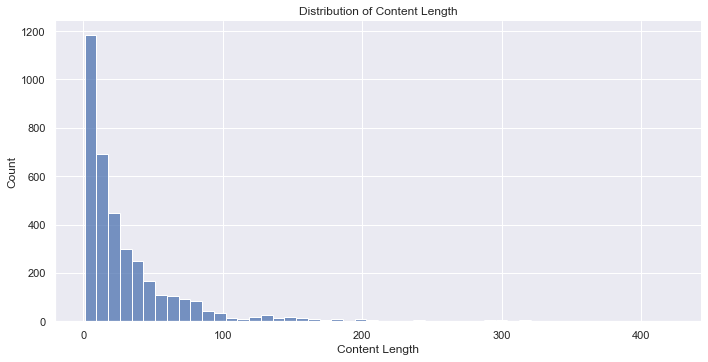

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# Adjust the size and resolution of the figure
plt.figure(figsize=(20, 12), dpi=100)

# Create the bar chart using displot with adjusted aspect and bins
sns.displot(df_new.contents_len, kde=False, aspect=2, bins=50)

# Set the labels and title
plt.xlabel('Content Length')
plt.ylabel('Count')
plt.title('Distribution of Content Length')

# Show the plot
plt.show()


In [96]:
print("The longest contents has: {} words".format(df_new.contents_len.max()))

The longest contents has: 422 words


In [97]:
# Let have a look at some reviews and the longest one
for idx in df_new.sample(3).index:
    reviews = df_new.iloc[idx]
    print("Reviews #{}:".format(idx))
    print("Titles: {}".format(reviews.titles))
    print("Contents: {}\n".format(reviews.contents))
     

Reviews #3311:
Titles: Could be better
Contents: Va bene

Reviews #473:
Titles: Great rain jacket
Contents: great jacket

Reviews #2830:
Titles: Great boots, comfy, noisy
Contents: Premium grade hiking shoes. High quality Vibram soles, looks awesome and comfortable. Good purchase!



### (III) Text Data Preprocessing

In [34]:
# # Remove stopwords
# stopwords = nltk.corpus.stopwords.words('english')
# print(f'There are {len(stopwords)} default stopwords. They are {stopwords}')

In [35]:
# # Remove stopwords
# # df_new['titles_without_stopwords'] = df_new['titles'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))
# df_new['contents_without_stopwords'] = df_new['contents'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))

# # Lemmatization
# # df_new['titles_lemmatized'] = df_new['titles_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))
# df_new['contents_lemmatized'] = df_new['contents_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))

# df_new.head(10)


### (I) Data & Packages

In [2]:
# from sklearn.datasets import fetch_20newsgroups
# data = fetch_20newsgroups(subset='all')['data']

### (II) Embeddings

In [3]:
# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('distilbert-base-nli-mean-tokens')
# embeddings = model.encode(data, show_progress_bar=True)

Batches:   0%|          | 0/589 [00:00<?, ?it/s]

### (III) Clustering

- Neighborhood size determines the local connectivity and the amount of detail captured in the resulting low-dimensional embedding. A larger neighborhood size will result in a more global view of the data, while a smaller neighborhood size will focus on capturing local structure.

- A low value forces UMAP to focus more on local structure, and may lose insights into the big picture.

- A high value pushes UMAP to look at the broader neighborhood, and may lose details on local structure.

### (IV) BERTopic

### UMAP - Uniform Manifold Approximation and Projection
Dimensionality reduction technique that is commonly used for visualizing high-dimensional data

In [98]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df_new['contents'])

### (V) Extract Topics From Topic Modelling

In [99]:
# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,927,-1_the_and_to_it,"[the, and, to, it, is, this, in, for, my, are]","[These shoes came early, and fit right out of ..."
1,0,235,0_slippers_feet_these_they,"[slippers, feet, these, they, are, them, warm,...",[I have only had these she for a couple weeks ...
2,1,159,1_rain_jacket_it_dry,"[rain, jacket, it, dry, hood, pocket, lightwei...",[I was looking for a lightweight rain jacket t...
3,2,87,2_medium_large_ordered_small,"[medium, large, ordered, small, room, arms, hi...",[Love this coat and the color. I normally wear...
4,3,86,3_thanks_excellent_title_woo,"[thanks, excellent, title, woo, ok, good, na, ...","[Thanks, Thanks, Thanks]"
...,...,...,...,...,...
90,89,11,89_quality_excelent_originals_approved,"[quality, excelent, originals, approved, total...",[Totally approved great price. Good quality! O...
91,90,11,90_parent_vocal_woke_bud,"[parent, vocal, woke, bud, participate, charad...",[I am returning it. Will truly miss its comfor...
92,91,11,91_adhesive_logo_hat_off,"[adhesive, logo, hat, off, north, letter, tool...",[Great Hat!\nThe North Face logo label on the ...
93,92,11,92_jacket_patagonia_chile_apex,"[jacket, patagonia, chile, apex, bionic, idea,...",[I purchased this jacket prior to a trip to so...


In [100]:
# Get top 10 terms for a topic
topic_model.get_topic(0)

[('slippers', 0.023784930529995855),
 ('feet', 0.017609066724842293),
 ('these', 0.01612192935964048),
 ('they', 0.015575491177954417),
 ('are', 0.015366025309733522),
 ('them', 0.014138414223143379),
 ('warm', 0.01340165655242923),
 ('have', 0.01016891964608923),
 ('slipper', 0.00992664408424025),
 ('the', 0.009897325454893595)]

In [101]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=12)

In [102]:
# Visualize term rank decrease
topic_model.visualize_term_rank()

### (VI) Topic Similarities

In [108]:
# Visualize intertopic distance
topic_model.visualize_topics()

In [42]:
# Visualize connections between topics using hierachical clustering
topic_model.visualize_hierarchy(top_n_topics=10)

In [43]:
# Visualize similarity using heatmap
topic_model.visualize_heatmap()

### (VI) Topic Model Predicted Probabilities

In [44]:
# Visualize probability distribution
topic_model.visualize_distribution(topic_model.probabilities_[0], min_probability=0.015)


In [104]:
# Save the chart to a variable
chart = topic_model.visualize_distribution(topic_model.probabilities_[0], min_probability=0.0001)
# Write the chart as a html file
chart.write_html("amazon_the_north_face_topic_probability_distribution.html")


- The topic probability distribution for the first review in the dataset shows that topic 4 has the highest probability, so it is the predicted topic.

In [105]:
# Check the content for the first review
df_new['contents'][0]

'This is a must have if you are in a rainy area. I will make sure to mention that if you want a more tighter fit to go down a size. I have already used it 3 times under heavy rain and it works great.'

- The first review is 'This is a must have if you are in a rainy area. I will make sure to mention that if you want a more tighter fit to go down a size. I have already used it 3 times under heavy rain and it works great.', and the topic of 'rainy' is pretty relevant.

In [106]:
# Get probabilities for all topics
topic_model.probabilities_[0]

array([0.00344201, 0.09808873, 0.01232347, 0.00221464, 0.00668939,
       0.00428571, 0.00310285, 0.00332854, 0.00154317, 0.0139882 ,
       0.00157285, 0.00680431, 0.00324917, 0.00325946, 0.00303353,
       0.00268683, 0.00325426, 0.00312071, 0.00153628, 0.00327094,
       0.0067115 , 0.00336435, 0.001654  , 0.0031193 , 0.0119036 ,
       0.00471885, 0.00166134, 0.00154353, 0.00647977, 0.00150956,
       0.00231877, 0.01301174, 0.00253036, 0.03072119, 0.00568866,
       0.00815362, 0.00269218, 0.00503684, 0.00485068, 0.00447261,
       0.00398331, 0.00480312, 0.00323621, 0.00508284, 0.00356765,
       0.01484865, 0.00374678, 0.01431372, 0.0031816 , 0.00257398,
       0.0028701 , 0.01155034, 0.00983208, 0.00303868, 0.003176  ,
       0.00493429, 0.00305341, 0.00534962, 0.00338164, 0.03492756,
       0.00819017, 0.01908947, 0.00417443, 0.00314662, 0.00415164,
       0.00377133, 0.01988695, 0.00697098, 0.00153592, 0.00637993,
       0.00533912, 0.00152948, 0.00577885, 0.00306372, 0.00310

In [107]:
max_index = np.argmax(topic_model.probabilities_[0])

print("Index of the highest value:", max_index)
print("Highest value:", probabilities[max_index])

Index of the highest value: 1
Highest value: [1.49343874e-03 7.48123057e-01 5.46317462e-03 1.01385018e-03
 2.81311008e-03 1.93093271e-03 1.35324551e-03 1.45353906e-03
 7.13825019e-04 6.16212246e-03 7.26837770e-04 2.76311622e-03
 1.48247077e-03 1.41881974e-03 1.32790758e-03 1.20538234e-03
 1.41875266e-03 1.41904213e-03 7.09806599e-04 1.43473082e-03
 2.92764031e-03 1.52797570e-03 7.63498057e-04 1.49289621e-03
 5.46707564e-03 2.04172981e-03 7.67050102e-04 7.13562897e-04
 2.97734979e-03 6.98267650e-04 1.06094552e-03 5.47479090e-03
 1.15657734e-03 1.80901837e-02 2.68614309e-03 3.37885890e-03
 1.27144693e-03 2.25147283e-03 2.11806646e-03 1.95924187e-03
 1.76856323e-03 2.10222339e-03 1.41658207e-03 2.17935501e-03
 1.62310282e-03 6.47658930e-03 1.62905211e-03 5.51494542e-03
 1.51998670e-03 1.14270039e-03 1.36844744e-03 4.78104665e-03
 4.19625046e-03 1.38801561e-03 1.51675576e-03 2.14181354e-03
 1.33588726e-03 2.46064823e-03 1.62479162e-03 1.80983187e-02
 3.41243974e-03 9.34233695e-03 1.8551735

- There are 94 probability values, one for each topic. The index 1 has the highest value of 7.48123057e-01, indicating that topic 1 is the predicted topic with the most dominant or relevant topic based on the input.
- The overall probability distribution shows variations in the probabilities across different topics. Some topics have higher probabilities, while others have lower probabilities, indicating the varying importance or relevance of different topics within the dataset or model.
- The sum of all probability values is approximately 1, indicating that the probabilities represent a valid probability distribution.

- There are 94 probability values, one for each topic. The index 1 has the highest value of 7.48123057e-01, indicating that topic 1 is the predicted topic with the most dominant or relevant topic based on the input.
- Topics with higher probabilities, such as topic 7, topic 17, topic 24, and topic 25, have relatively higher values compared to other topics. This indicates that these topics have a higher likelihood of being the prominent or important topics in the context.
- Topics with lower probabilities, such as topics 2, 3, 5, 6, and 11, have relatively lower values. This suggests that these topics have a lower likelihood of being significant or prominent in the given context.

From the given probability distribution, we can make several observations:

The highest probability is at index 7, with a value of 0.17397613. This suggests that topic 7 is the most dominant or relevant topic based on the given input or document.

Topics with higher probabilities, such as topic 7, topic 17, topic 24, and topic 25, have relatively higher values compared to other topics. This indicates that these topics have a higher likelihood of being the prominent or important topics in the context.

Topics with lower probabilities, such as topics 2, 3, 5, 6, and 11, have relatively lower values. This suggests that these topics have a lower likelihood of being significant or prominent in the given context.

The overall probability distribution shows variations in the probabilities across different topics. Some topics have higher probabilities, while others have lower probabilities, indicating the varying importance or relevance of different topics within the dataset or model.

The sum of all probability values is approximately 1, indicating that the probabilities represent a valid probability distribution.


The array you provided seems to be a probability distribution representing the probabilities of different topics. Here are some observations you can make from the array:

Each value in the array corresponds to the probability of a specific topic. The index of the array represents the topic number.

The values in the array range from very small numbers (e.g., 0.001) to larger numbers (e.g., 0.064). These values represent the likelihood of each topic being present in the given data.

The topic with the highest probability is not explicitly mentioned in the provided array, as you have only provided the probability values without their corresponding topic labels. However, you can find the topic with the highest probability by identifying the index with the maximum value in the array.

The distribution of probabilities indicates how evenly the topics are distributed in the given data. If all the probabilities are relatively equal, it suggests that the topics are equally represented. Conversely, if there are significant variations in the probability values, it indicates that some topics are more dominant or prevalent in the data.

The sum of all the probability values in the array should be close to 1, as they represent probabilities. You can verify this by summing up all the values in the array and checking if the result is approximately 1.

To gain a better understanding of the topics and their probabilities, it would be helpful to have the corresponding topic labels or names associated with each probability value. This way, you can identify the most probable topic and analyze the distribution of topics in the data.

### (VIII) Topic Model In-sample Predictions

In [49]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]
# Save the predictions in the dataframe
df_new['topic_prediction'] = topic_prediction
# Take a look at the data
df_new.head(10)

,titles,contents,contents_len,topic_prediction
0,Worth every penny,This is a must have if you are in a rainy area...,45,-1
1,comfortable and completely water proof,"very wet rainy season this year, so had ample ...",25,1
2,Muy útil,"Cómoda , resiste el frío y el agua",8,-1
3,Very Nice,Fits well and great materials and construction,7,5
4,"Different fit, cheaper design",I am replacing the original venture jacket. Th...,151,-1
5,Garment,Color inside. Pockets,3,37
6,Keeps me dry.,The jacket looks to be well made and did a gre...,46,33
7,Outstanding Quality,Exactly what I ordered! The product is outstan...,16,-1
8,as expected,very lightweight weatherproof shell. the mater...,17,59
9,It's just a basic windbreaker,You're definitly only paying for the name. The...,32,-1


In [50]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]
# Save the predictions in the dataframe
df_new['topic_prediction'] = topic_prediction
# Take a look at the data
df_new

,titles,contents,contents_len,topic_prediction
0,Worth every penny,This is a must have if you are in a rainy area...,45,-1
1,comfortable and completely water proof,"very wet rainy season this year, so had ample ...",25,1
2,Muy útil,"Cómoda , resiste el frío y el agua",8,-1
3,Very Nice,Fits well and great materials and construction,7,5
4,"Different fit, cheaper design",I am replacing the original venture jacket. Th...,151,-1
...,...,...,...,...
3680,Finally a hat that looks decent on me,so small. should be for children. no full grow...,19,23
3681,The North Face Logo is easily removed!!,Perfect fit!,2,-1
3682,this hat was way too small,I love this hat! I have a shaved head and glas...,81,48
3683,Finally a hat that looks decent on me,Great Hat!\nThe North Face logo label on the f...,66,91


In [51]:
filtered_df_new = df_new[df_new['topic_prediction'] == -1]
filtered_df_new

,titles,contents,contents_len,topic_prediction
0,Worth every penny,This is a must have if you are in a rainy area...,45,-1
2,Muy útil,"Cómoda , resiste el frío y el agua",8,-1
4,"Different fit, cheaper design",I am replacing the original venture jacket. Th...,151,-1
7,Outstanding Quality,Exactly what I ordered! The product is outstan...,16,-1
9,It's just a basic windbreaker,You're definitly only paying for the name. The...,32,-1
...,...,...,...,...
3663,This felt child size on my fairly normal adult...,Really small. Flap didn’t even cover my neck a...,31,-1
3664,Gift for cancer patient,My husband and I gifted this to my sister in l...,91,-1
3667,Decent,My son loves it and wears it to scout camp,10,-1
3677,Finally a hat that looks decent on me,Perfect fit!,2,-1


### (IX) Topic Model Predictions on New Data

In [52]:
# New data for the review
new_review = "I like it very much. It is great."
# Find topics
num_of_topics = 3
similar_topics, similarity = topic_model.find_topics(new_review, top_n=num_of_topics); 
# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

The top 3 similar topics are [53, 44, 32], and the similarities are [0.67 0.61 0.59]


In [53]:
# Print the top keywords for the top similar topics
for i in range(num_of_topics):
  print(f'The top keywords for topic {similar_topics[i]} are:')
  print(topic_model.get_topic(similar_topics[i]))

The top keywords for topic 53 are:
[('loved', 0.23737017206317004), ('grandson', 0.15794218120172202), ('son', 0.14764446548864965), ('enjoy', 0.14119937264150967), ('wanted', 0.12334479529832487), ('assuming', 0.1097578893698224), ('what', 0.08460859023029074), ('it', 0.08258012364818298), ('exactly', 0.07660209551080732), ('my', 0.06474816750640236)]
The top keywords for topic 44 are:
[('gift', 0.07374808403332861), ('picky', 0.06516894121915831), ('he', 0.06302775737271567), ('complaints', 0.05831538249358586), ('crossbody', 0.05698967332663857), ('it', 0.055666358653532255), ('matching', 0.05209496732313151), ('23', 0.04887670591436873), ('christmas', 0.04399739957009343), ('loves', 0.04192274559426372)]
The top keywords for topic 32 are:
[('love', 0.377860013262161), ('it', 0.17780409397934135), ('like', 0.14964891066935193), ('thank', 0.1171508808159618), ('im', 0.10068493251173784), ('lot', 0.08673336002816572), ('not', 0.05162037833607398), ('you', 0.03410483450619085), ('its',

In [54]:
# New data for the review
new_review = "I like it very much. It is great."
# Find topics
num_of_topics = 5
similar_topics, similarity = topic_model.find_topics(new_review, top_n=num_of_topics); 
# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

The top 5 similar topics are [53, 44, 32, 84, 31], and the similarities are [0.67 0.61 0.59 0.57 0.45]


In [55]:
# Print the top keywords for the top similar topics
for i in range(num_of_topics):
  print(f'The top keywords for topic {similar_topics[i]} are:')
  print(topic_model.get_topic(similar_topics[i]))

The top keywords for topic 53 are:
[('loved', 0.23737017206317004), ('grandson', 0.15794218120172202), ('son', 0.14764446548864965), ('enjoy', 0.14119937264150967), ('wanted', 0.12334479529832487), ('assuming', 0.1097578893698224), ('what', 0.08460859023029074), ('it', 0.08258012364818298), ('exactly', 0.07660209551080732), ('my', 0.06474816750640236)]
The top keywords for topic 44 are:
[('gift', 0.07374808403332861), ('picky', 0.06516894121915831), ('he', 0.06302775737271567), ('complaints', 0.05831538249358586), ('crossbody', 0.05698967332663857), ('it', 0.055666358653532255), ('matching', 0.05209496732313151), ('23', 0.04887670591436873), ('christmas', 0.04399739957009343), ('loves', 0.04192274559426372)]
The top keywords for topic 32 are:
[('love', 0.377860013262161), ('it', 0.17780409397934135), ('like', 0.14964891066935193), ('thank', 0.1171508808159618), ('im', 0.10068493251173784), ('lot', 0.08673336002816572), ('not', 0.05162037833607398), ('you', 0.03410483450619085), ('its',

- We can see that the keywords for topic 52 are loved, enjoy and wanted while for topic 69 are gift, matching and loves. Both topics are a good fit for the new review. For Topic 38, 18 and 42, They keywords fot Topic 38, 18 and 42 are 'love, like, amazing', 'fits, loved, perfect' and 'comfortable, good, modern' respectively.

### (X) Save and Load the Topic Models

In [56]:
# Save the topic model
topic_model.save("amazon_tnf_topic_model")	
# Load the topic model
my_model = BERTopic.load("amazon_tnf_topic_model")

### HDBSCAN - Hierarchical Density-Based Spatial Clustering of Applications with Noise
To perform clustering by assigning data points to clusters based on their density and connectivity, which does not require specifying the number of clusters in advance

### Data & Packages

In [57]:
# Load data from Excel file
excel_file = "C:\\Users\\peini\\Desktop\\Data Science\\DS105_Machine Learning & Data Preprocessing\\Final Project - Machine Learning Proposal\\excel_file.xlsx" 
df = pd.read_excel(excel_file)

# Replace 'NaN' values with empty string
df['contents'] = df['contents'].fillna('')

# Convert any remaining float values to string
df['contents'] = df['contents'].astype(str)

# Extract text data from the dataframe
data = df['contents'].tolist()

# Fit the data to BERTopic model
topic_model = BERTopic(language="english")
topics, _ = topic_model.fit_transform(data)

# Output the topics or perform further analysis
print(topics)

[12, 12, -1, 6, -1, 37, 26, -1, -1, -1, -1, 12, -1, 6, -1, 37, 26, -1, -1, -1, -1, 35, -1, -1, 2, -1, 26, 0, 53, 26, 2, 26, 5, 34, -1, 81, 26, -1, 2, 0, 54, -1, 12, 17, -1, 26, 2, 26, 2, -1, -1, -1, -1, 64, -1, 65, 2, 2, 12, -1, 40, -1, 44, 2, -1, 76, 2, -1, 2, -1, 12, 2, 12, 2, 2, -1, 28, -1, 86, -1, 84, 2, 2, 82, 17, 12, 76, 17, 2, 2, -1, 2, 76, 12, 2, -1, 0, 68, 12, 0, -1, 73, 2, -1, 17, 2, 17, 70, 0, 2, 26, 2, 0, -1, 1, -1, 17, 0, 17, 2, 73, 2, -1, -1, 0, -1, -1, -1, -1, -1, -1, 70, -1, 44, 2, 0, -1, 88, 2, 26, -1, -1, -1, 31, 53, 17, 59, 2, 6, 2, -1, 2, -1, 40, 2, 17, 2, 0, 0, 17, -1, 65, 49, 76, 54, 26, 20, 14, 12, 17, -1, -1, 20, -1, 2, -1, -1, -1, 2, -1, 69, -1, 6, 2, 45, 91, -1, -1, 12, 0, -1, 0, -1, -1, 34, 0, -1, 72, -1, 2, -1, 2, -1, 6, -1, 6, 0, 12, 44, 19, -1, 12, -1, 12, -1, 91, 0, 19, 12, 51, -1, 2, 0, -1, 0, 12, -1, 2, 6, -1, -1, -1, 38, 6, 53, 44, 0, -1, 12, 51, 2, 12, 4, 0, 2, 44, 50, 0, -1, 7, 34, -1, -1, 7, 92, -1, 12, 2, -1, 34, 92, 82, 17, 7, 5, 6, -1, -1, 17, 5,

In [58]:
# model = BERTopic(language="english")
# topics, probs = model.fit_transform(data)

### Embeddings

In [59]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(data, show_progress_bar=True)

Batches:   0%|          | 0/121 [00:00<?, ?it/s]

### Clustering

UMAP

In [60]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings)

HDBSAN

In [61]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

C:\Users\peini\AppData\Local\Temp\ipykernel_18636\4134104538.py:14: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



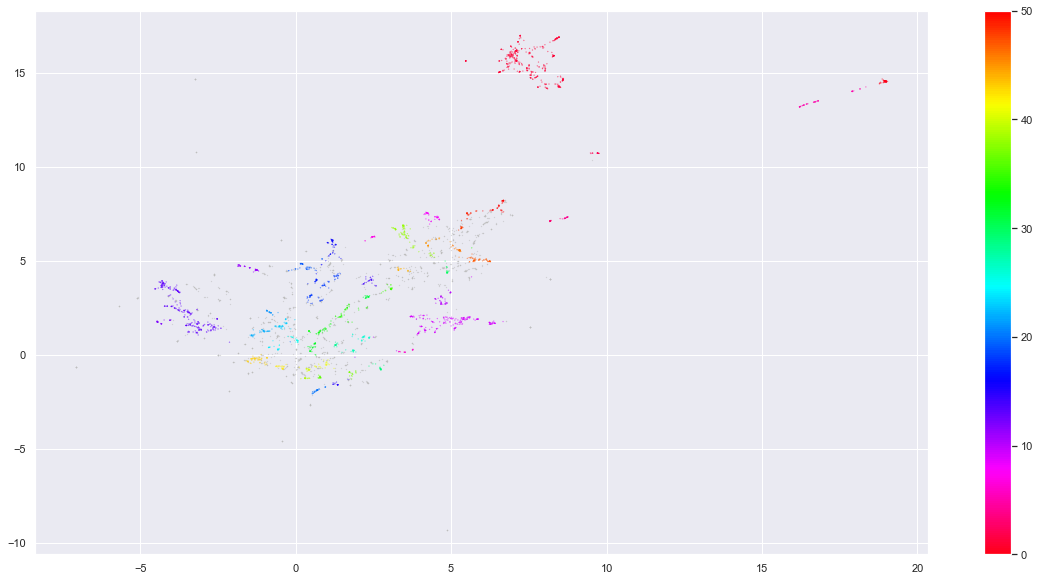

In [68]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

### (IV) Topic Creation

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used in natural language processing and information retrieval to measure the importance of a term in a document or a collection of documents. It is a technique that aims to reflect how relevant a term is to a document in a collection or corpus.

### c-TF-IDF

Calculates the importance of a term in a document relative to a collection of docuemnts

In [69]:
docs_df = pd.DataFrame(data, columns=["Doc"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

In [70]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(data))

### Topic Representation
Take top 20 words per topic based on the c-TF-IDF scores. The higher the score, the more representative it should be of its topic as the score is a proxy of information density.

In [71]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

,Topic,Size
0,-1,1361
2,1,422
14,13,284
10,9,223
39,38,88
1,0,86
19,18,70
48,47,55
44,43,54
12,11,51


In [72]:
top_n_words[1][:10]

[('la', 0.08969868011589092),
 ('que', 0.06774281843846568),
 ('es', 0.05861986528903239),
 ('el', 0.058484329485807965),
 ('en', 0.0566251256334775),
 ('muy', 0.05140561416968078),
 ('los', 0.03978664242414283),
 ('para', 0.03692900869375973),
 ('se', 0.03598444626515059),
 ('calidad', 0.03442878426958464)]

In [73]:
top_n_words[13][:10]

[('loves', 0.08269942271690822),
 ('husband', 0.08247596111198593),
 ('son', 0.06412805051929543),
 ('bought', 0.04527389307223432),
 ('great', 0.032535175893653866),
 ('christmas', 0.032500272545866335),
 ('gift', 0.029375466053784736),
 ('warm', 0.02936713375803458),
 ('wears', 0.02881328641813684),
 ('loved', 0.026437919448406264)]

In [74]:
top_n_words[9][:10]

[('small', 0.07839082867553959),
 ('tight', 0.06532899700045654),
 ('smaller', 0.04951529547311524),
 ('little', 0.04826716056701254),
 ('nice', 0.04681681283722384),
 ('like', 0.04260454351388943),
 ('quality', 0.039934976937918934),
 ('jacket', 0.034745854962684196),
 ('waist', 0.03465950576125692),
 ('really', 0.032335646440638736)]

### (V) Topic Reduction

In [15]:
# for i in range(20):
#     # Calculate cosine similarity
#     similarities = cosine_similarity(tf_idf.T)
#     np.fill_diagonal(similarities, 0)

#     # Extract label to merge into and from where
#     topic_sizes = docs_df.groupby(['Topic']).count().sort_values("Doc", ascending=False).reset_index()
#     topic_to_merge = topic_sizes.iloc[-1].Topic
#     topic_to_merge_into = np.argmax(similarities[topic_to_merge + 1]) - 1

#     # Adjust topics
#     docs_df.loc[docs_df.Topic == topic_to_merge, "Topic"] = topic_to_merge_into
#     old_topics = docs_df.sort_values("Topic").Topic.unique()
#     map_topics = {old_topic: index - 1 for index, old_topic in enumerate(old_topics)}
#     docs_df.Topic = docs_df.Topic.map(map_topics)
#     docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

#     # Calculate new topic words
#     m = len(data)
#     tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m)
#     top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)

# topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

,Topic,Size
0,-1,10391
18,17,871
58,57,856
31,30,827
17,16,640
73,72,387
71,70,365
50,49,295
48,47,209
70,69,207


### Topic Representation

In [76]:
similar_topics, similarity = topic_model.find_topics("gpu", top_n=5); similar_topics

[31, 8, 35, 98, 42]

In [77]:
topic_model.get_topic(18)

[('hat', 0.06443914504769854),
 ('brim', 0.030591271051810604),
 ('head', 0.025817777090332745),
 ('valentines', 0.023652700327633423),
 ('day', 0.018055730855032988),
 ('it', 0.017187793493731982),
 ('also', 0.01656397357733617),
 ('doesnt', 0.01621303039706249),
 ('blue', 0.015381891586444166),
 ('wearing', 0.014768928043222228)]

### Model Serialization

In [111]:
# Save the topic model
topic_model.save("new_amazon_tnf_topic_model")	
# Load the topic model
my_model = BERTopic.load("new_amazon_tnf_topic_model")

### Model Testing and Evaluation

In [112]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_contents(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Return the preprocessed text as a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text


In [113]:
df['contents']=df['contents'].fillna('').apply(str)

In [109]:
import pandas as pd
from bertopic import BERTopic
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

# Read the Excel file
df = pd.read_excel('excel_file.xlsx')

# Convert 'titles' and 'contents' columns to string
df['titles'] = df['titles'].apply(lambda x: str(x))
df['contents'] = df['contents'].apply(lambda x: str(x))

# Extract the column containing the text documents
documents = df['contents'].tolist()

# Initialize BERTopic
topic_model = BERTopic(verbose=True, n_gram_range=(1, 3))

# Fit BERTopic to your documents and obtain topics
topics, _ = topic_model.fit_transform(documents)

# Preprocess Documents
documents_per_topic = df.groupby(['titles'], as_index=False).agg({'contents': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.contents.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[word for word, _ in topic_model.get_topic(topic)] for topic in range(len(set(topics))-1)]

# Evaluate Topic Coherence
coherence_model = CoherenceModel(topics=topic_words, texts=tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
coherence = coherence_model.get_coherence()


Batches:   0%|          | 0/121 [00:00<?, ?it/s]

2023-06-29 17:06:48,299 - BERTopic - Transformed documents to Embeddings
2023-06-29 17:06:59,983 - BERTopic - Reduced dimensionality
2023-06-29 17:07:00,074 - BERTopic - Clustered reduced embeddings


In [110]:
coherence

0.47526544564719103